In [ ]:
"""
Purpose: 
To extract the full connectivity
graph from the AutoProofread table in the database
and output as a networkx graph

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty/graph/")

In [17]:
import datajoint_utils as du
minnie,schema = du.configure_minnie_vm()

INFO - 2021-05-24 17:49:53,451 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-05-24 17:49:53,453 - settings - Setting database.user to celiib
INFO - 2021-05-24 17:49:53,454 - settings - Setting database.password to newceliipass
INFO - 2021-05-24 17:49:53,458 - settings - Setting enable_python_native_blobs to True
INFO - 2021-05-24 17:49:54,580 - settings - Setting enable_python_native_blobs to True


In [18]:
import networkx_utils as xu
import networkx as nx
from pathlib import Path
import system_utils as su
import graph_visualizations as gviz
import graph_analysis as ga

# Getting the Initial Graph

In [ ]:
# orig_presyn,orig_postsyn = (du.m65mat.NucleusSynapse() & "presyn != postsyn").fetch("presyn","postsyn")
# original_edges = np.vstack([orig_presyn,orig_postsyn]).T
# orig_G = nx.MultiDiGraph()
# orig_G.add_edges_from(original_edges)
# print(len(orig_G.nodes()),len(orig_G.edges()))

# G_undirected_orig = nx.Graph(orig_G)
# print(len(G_undirected_orig.nodes()),len(G_undirected_orig.edges()))

# DiG_undirected_orig = nx.DiGraph(orig_G)
# print(len(DiG_undirected_orig.nodes()),len(DiG_undirected_orig.edges()))

In [13]:
G_orig_path = Path("/neuron_mesh_tools/Graph_Analysis/G_orig_multi_di.pbz2")
G_orig_path.exists()

True

In [14]:
if G_orig_path.exists():
    print(f"Loading original graph from saved file")
    G_orig_multi_di = su.decompress_pickle(G_orig_path)
else:
    orig_presyn,orig_postsyn = (du.m65mat.NucleusSynapse() & "presyn != postsyn").fetch("presyn","postsyn")
    original_edges = np.vstack([orig_presyn,orig_postsyn]).T
    G_orig_multi_di = nx.MultiDiGraph()
    _ = G_orig_multi_di.add_edges_from(original_edges)
    su.compressed_pickle(G_orig_multi_di,G_orig_path)

Loading original graph from saved file




---- Working on graph type multi_di ----- 


Stats for Original Graph (Multi-Edge,Directional)
Number of Nodes = 91,565
Number of Edges = 17,133,898
Original Graph (Multi-Edge,Directional) in_and_out degree distribution mean = 339.1879109179317,
Original Graph (Multi-Edge,Directional) in_and_out degree distribution median = 201.0


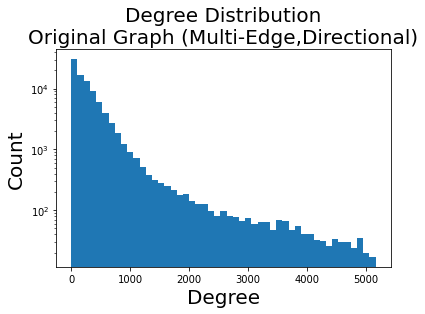

Original Graph (Multi-Edge,Directional) in degree distribution mean = 175.91157649796392,
Original Graph (Multi-Edge,Directional) in degree distribution median = 123.0


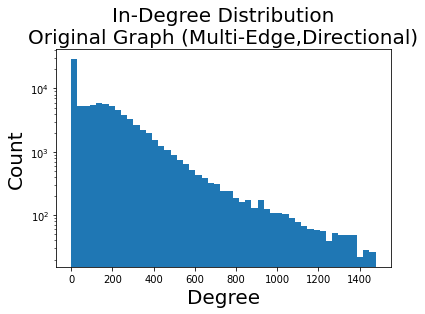

Original Graph (Multi-Edge,Directional) out degree distribution mean = 158.71759579395655,
Original Graph (Multi-Edge,Directional) out degree distribution median = 57.0


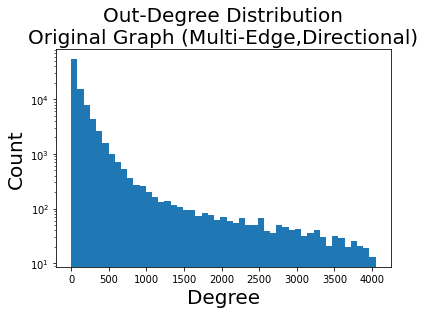

Cant perform connected component analysis


---- Working on graph type multi ----- 




KeyboardInterrupt: 

In [21]:
original_stats = ga.graph_analysis_different_graph_types(G = G_orig_multi_di,
                                                           graph_title="Original")

# Getting the Direct Connections Graph

In [40]:
direct_conn_df = du.fetch_proofread_direct_connections_df()

In [41]:
G_proof_multi_di = ga.direct_conn_df_to_G(direct_conn_df)

  0%|          | 0/1332365 [00:00<?, ?it/s]



---- Working on graph type multi_di ----- 


Stats for Proofread Graph (Multi-Edge,Directional)
Number of Nodes = 65,201
Number of Edges = 1,332,365
Proofread Graph (Multi-Edge,Directional) in_and_out degree distribution mean = 34.51321022289361,
Proofread Graph (Multi-Edge,Directional) in_and_out degree distribution median = 20.0


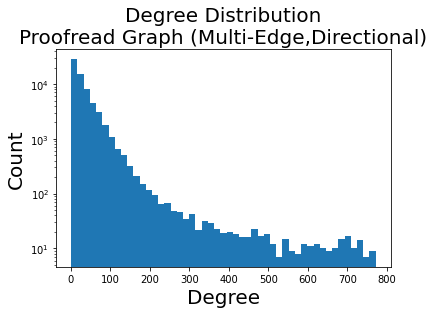

Proofread Graph (Multi-Edge,Directional) in degree distribution mean = 19.513241460106055,
Proofread Graph (Multi-Edge,Directional) in degree distribution median = 14.0


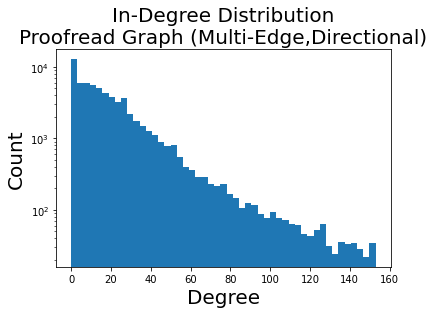

Proofread Graph (Multi-Edge,Directional) out degree distribution mean = 14.503853623947961,
Proofread Graph (Multi-Edge,Directional) out degree distribution median = 1.0


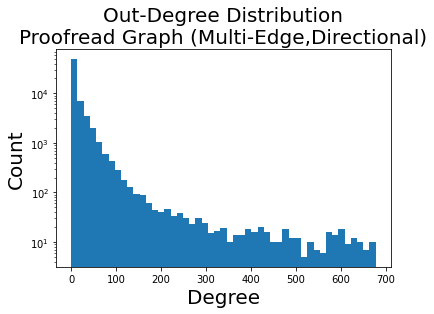

Cant perform connected component analysis


---- Working on graph type multi ----- 


Stats for Proofread Graph (Multi-Edge,Undirectional)
Number of Nodes = 65,201
Number of Edges = 1,312,850
Proofread Graph (Multi-Edge,Undirectional) in_and_out degree distribution mean = 34.09123980700754,
Proofread Graph (Multi-Edge,Undirectional) in_and_out degree distribution median = 20.0


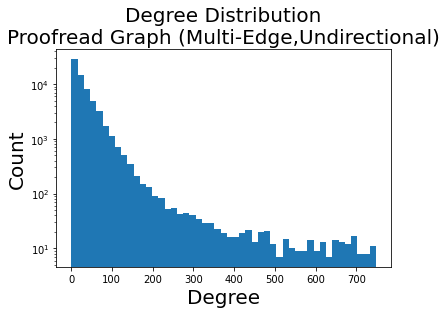

Proofread Graph (Multi-Edge,Undirectional) in distribution can't be graphed
Proofread Graph (Multi-Edge,Undirectional) out distribution can't be graphed
Working on Largest component
Stats for Proofread Graph (Multi-Edge,Undirectional)
Largest Component
Number of Nodes = 64,979
Number of Edges = 1,312,710
Proofread Graph (Multi-Edge,Undirectional)
Largest Component in_and_out degree distribution mean = 34.23717016735237,
Proofread Graph (Multi-Edge,Undirectional)
Largest Component in_and_out degree distribution median = 20.0


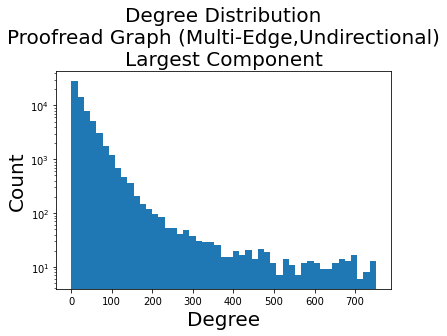

Proofread Graph (Multi-Edge,Undirectional)
Largest Component in distribution can't be graphed
Proofread Graph (Multi-Edge,Undirectional)
Largest Component out distribution can't be graphed


---- Working on graph type di ----- 


Stats for Proofread Graph (Unique-Edge,Directional)
Number of Nodes = 65,201
Number of Edges = 984,872
Proofread Graph (Unique-Edge,Directional) in_and_out degree distribution mean = 26.60874926781145,
Proofread Graph (Unique-Edge,Directional) in_and_out degree distribution median = 16.0


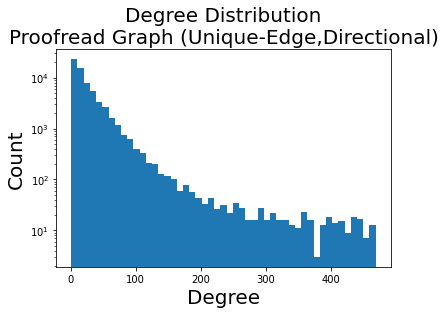

Proofread Graph (Unique-Edge,Directional) in degree distribution mean = 14.415072526320657,
Proofread Graph (Unique-Edge,Directional) in degree distribution median = 11.0


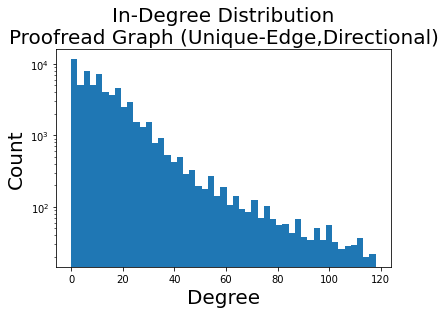

Proofread Graph (Unique-Edge,Directional) out degree distribution mean = 11.831254913446273,
Proofread Graph (Unique-Edge,Directional) out degree distribution median = 1.0


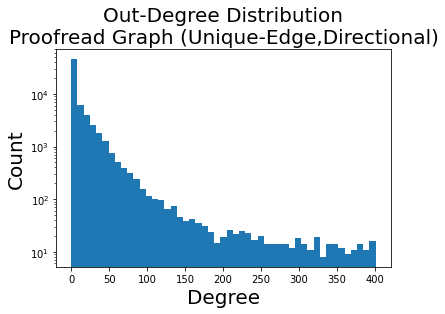

Cant perform connected component analysis


---- Working on graph type simple ----- 


Stats for Proofread Graph (Unique-Edge,Undirectional)
Number of Nodes = 65,201
Number of Edges = 972,575
Proofread Graph (Unique-Edge,Undirectional) in_and_out degree distribution mean = 26.3439128156118,
Proofread Graph (Unique-Edge,Undirectional) in_and_out degree distribution median = 16.0


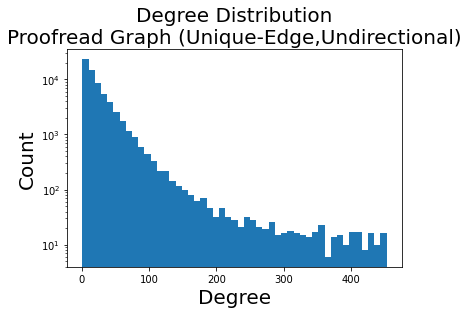

Proofread Graph (Unique-Edge,Undirectional) in distribution can't be graphed
Proofread Graph (Unique-Edge,Undirectional) out distribution can't be graphed
Working on Largest component
Stats for Proofread Graph (Unique-Edge,Undirectional)
Largest Component
Number of Nodes = 64,979
Number of Edges = 972,458
Proofread Graph (Unique-Edge,Undirectional)
Largest Component in_and_out degree distribution mean = 26.437365628818462,
Proofread Graph (Unique-Edge,Undirectional)
Largest Component in_and_out degree distribution median = 16.0


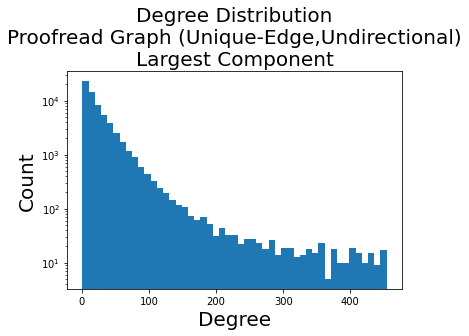

Proofread Graph (Unique-Edge,Undirectional)
Largest Component in distribution can't be graphed
Proofread Graph (Unique-Edge,Undirectional)
Largest Component out distribution can't be graphed


In [46]:
proofread_stats = ga.graph_analysis_different_graph_types(G = G_proof_multi_di,
                                                           graph_title="Proofread")

# Adding on the attributes to a graph

In [ ]:
# #in microns_utils.py
# add_node_attributes_to_proofread_graph

In [42]:
import microns_utils as mru
G_proof_multi_di_with_attributes = mru.add_node_attributes_to_proofread_graph(G_proof_multi_di)
#G_proof_multi_di_with_attributes.nodes[70295.0]

# saving off the proofread graph

In [43]:
proof_graph_path = Path("/neuron_mesh_tools/Graph_Analysis/G_proof_v4.pbz2")
su.compressed_pickle(G_proof_multi_di_with_attributes,proof_graph_path)

Saved object at /neuron_mesh_tools/Graph_Analysis/G_proof_v4.pbz2
File size is 83.297259 MB


# Saving off the excitatory proofread graph

In [47]:
import networkx_utils as xu
excitatory_nodes = xu.get_nodes_with_attributes_dict(G_proof_multi_di_with_attributes,
                                 dict(cell_type_predicted="excitatory",
                                     spine_category="densely_spined"))
G_proof_multi_di_exc = G_proof_multi_di_with_attributes.subgraph(excitatory_nodes)
print(len(G_proof_multi_di_exc.nodes()))

49409


In [48]:
proof_graph__exc_path = Path("/neuron_mesh_tools/Graph_Analysis/G_proof_v4_excitatory.pbz2")
su.compressed_pickle(G_proof_multi_di_with_attributes,proof_graph__exc_path)

Saved object at /neuron_mesh_tools/Graph_Analysis/G_proof_v4_excitatory.pbz2
File size is 83.297259 MB
